<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [842]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

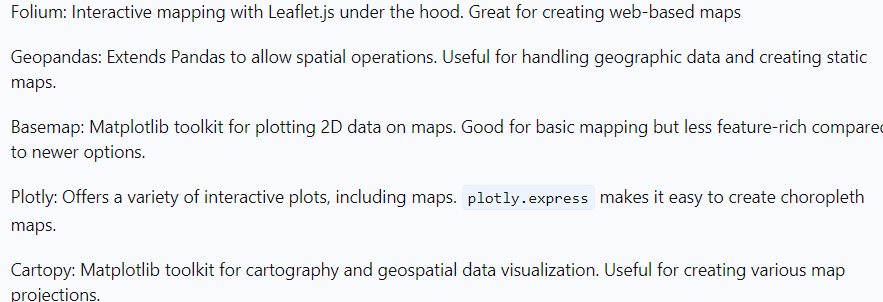

## Dataset Loading

In [843]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [844]:
df_1 = pd.read_csv('belga_0711.csv')
df_1['bus_dispatched'] = 3;
df_2 = pd.read_csv('deocareza_0711.csv')
df_2['bus_dispatched'] = 1
df_3 = pd.read_csv('graceda_0711.csv')
df_3['bus_dispatched'] = 2;
df_4 = pd.read_csv('manuel_0711.csv')
df_4['bus_dispatched'] = 4;
df_5 = pd.read_csv('paralde_0711.csv')
df_5['bus_dispatched'] = 5;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [845]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,...,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched,accelY...21,DRIVER,driver
103847,121.041672,14.560560,2023-07-11 16:21:33,0,0,18.0,16.0,21.0,33.0,1,...,-0.001704,0.006063,Northbound,0,0,0,1,16.0,NaN,NaN
57590,121.025322,14.546865,2023-07-11 19:58:02,0,0,38.0,19.0,58.0,2.0,1,...,0.000000,0.000000,Northbound,10,0,0,3,NaN,NaN,NaN
60291,120.990023,14.529015,2023-07-11 03:52:19,0,0,18.0,3.0,52.0,19.0,1,...,-0.001870,0.001880,Northbound,9,0,0,1,76.0,NaN,NaN
123704,121.029075,14.549765,2023-07-11 04:33:12,0,0,32.0,4.0,33.0,12.0,1,...,0.000000,0.000000,Northbound,5,5,0,2,NaN,Jigs Nacor Graceda,NaN
21616,120.990795,14.657342,2023-07-11 09:48:38,0,0,20.0,9.0,48.0,38.0,1,...,0.000000,0.000000,Northbound,8,0,0,3,NaN,NaN,NaN
151047,121.056327,14.586205,2023-07-11 16:51:30,0,0,28.0,16.0,51.0,30.0,1,...,0.000000,0.000000,Northbound,9,0,0,2,NaN,Jigs Nacor Graceda,NaN
101764,120.990977,14.536627,2023-07-11 15:45:56,0,0,11.0,15.0,45.0,56.0,1,...,0.000000,0.000000,Northbound,8,0,0,1,17.0,NaN,NaN
7857,121.029593,14.655493,2023-07-11 06:07:00,0,0,59.0,6.0,7.0,0.0,1,...,0.008630,0.001446,Southbound,1,0,0,3,NaN,NaN,NaN
151702,121.053932,14.613418,2023-07-11 17:02:10,0,0,31.0,17.0,2.0,10.0,1,...,-0.002293,0.001264,Northbound,0,0,0,2,NaN,Jigs Nacor Graceda,NaN
47099,121.013738,14.539180,2023-07-11 17:08:19,0,0,15.0,17.0,8.0,19.0,1,...,-0.001231,0.011988,Northbound,1,0,0,3,NaN,NaN,NaN


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230623 entries, 0 to 230622
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   longitude                      230623 non-null  float64
 1   latitude                       230623 non-null  float64
 2   timestamp                      230623 non-null  object 
 3   Board                          230623 non-null  int64  
 4   Alight                         230623 non-null  int64  
 5   Numpass                        230623 non-null  float64
 6   Hour                           230623 non-null  float64
 7   Min                            230623 non-null  float64
 8   Sec                            230623 non-null  float64
 9   Day_of_week                    230623 non-null  int64  
 10  stop_cluster                   230623 non-null  int64  
 11  distance_from_cluster_0        230623 non-null  float64
 12  distance_from_cluster_18      

In [847]:
df.drop(columns = ['accelY...21', 'DRIVER','driver'], inplace=True)

In [848]:
df.describe()

,longitude,latitude,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
count,230623.000000,230623.000000,230623.000000,230623.000000,230623.000000,230623.000000,230623.000000,230623.000000,230623.0,230623.000000,230623.000000,230623.000000,230618.000000,230618.000000,230623.000000,230623.000000,230623.000000,230623.000000
mean,121.016152,14.584577,0.010823,0.011577,23.832098,11.784128,29.259090,29.479995,1.0,9.366551,9.598260,9.012541,-0.000059,0.000065,4.528299,0.059439,0.043140,2.724082
std,0.024996,0.054566,0.103469,0.106974,17.394840,4.987096,17.248773,17.271991,0.0,5.981146,5.161235,6.143293,0.022493,0.035354,3.320083,0.660467,0.662508,1.375785
min,120.983440,14.504180,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.0,0.000000,0.002496,0.004429,-6.606247,-2.654167,0.000000,0.000000,0.000000,1.000000
25%,120.991273,14.537443,0.000000,0.000000,13.000000,7.000000,14.000000,14.000000,1.0,4.000000,5.073565,3.065523,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,121.011372,14.568443,0.000000,0.000000,22.000000,11.000000,29.000000,30.000000,1.0,9.000000,11.702050,8.747207,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000
75%,121.039237,14.650010,0.000000,0.000000,31.000000,16.000000,44.000000,44.000000,1.0,14.000000,13.382489,16.207400,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000
max,121.059888,14.658380,1.000000,1.000000,124.000000,21.000000,59.000000,59.000000,1.0,20.000000,17.017335,16.712787,2.996974,12.528954,10.000000,12.000000,16.000000,5.000000


In [849]:
df.isnull().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Day_of_week,0


In [850]:
df.duplicated().sum()

1229

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230623 entries, 0 to 230622
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   longitude                      230623 non-null  float64
 1   latitude                       230623 non-null  float64
 2   timestamp                      230623 non-null  object 
 3   Board                          230623 non-null  int64  
 4   Alight                         230623 non-null  int64  
 5   Numpass                        230623 non-null  float64
 6   Hour                           230623 non-null  float64
 7   Min                            230623 non-null  float64
 8   Sec                            230623 non-null  float64
 9   Day_of_week                    230623 non-null  int64  
 10  stop_cluster                   230623 non-null  int64  
 11  distance_from_cluster_0        230623 non-null  float64
 12  distance_from_cluster_18      

In [852]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

longitude
[120.98904   120.98889   120.988825  ... 120.9925416 120.98802
 120.9879066]
latitude
[14.5079683 14.5079516 14.5079383 ... 14.65581   14.6558716 14.6569316]
timestamp
['2023-07-11 04:00:55' '2023-07-11 04:00:56' '2023-07-11 04:00:57' ...
 '2023-07-11 21:23:02' '2023-07-11 21:23:03' '2023-07-11 21:23:04']
Board
[0 1]
Alight
[0 1]
Numpass
[ 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  13.  12.  11.  10.   9.   8.   7.   6.   5.   4.   3.
   2.   1.   0.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  76.  75.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  92.  91.  93.  94.  96.  95.  97.
  98. 100. 101. 102. 103.  99. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 123. 124. 121.]
Hour
[ 4.  5.  

In [853]:
'''df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)'''

"df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',\n                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',\n                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',\n                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',\n                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',\n                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',\n                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)"

In [854]:
df[(df['Alight'] == True) & (df['Board'] == True)]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched


In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230623 entries, 0 to 230622
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   longitude                      230623 non-null  float64
 1   latitude                       230623 non-null  float64
 2   timestamp                      230623 non-null  object 
 3   Board                          230623 non-null  int64  
 4   Alight                         230623 non-null  int64  
 5   Numpass                        230623 non-null  float64
 6   Hour                           230623 non-null  float64
 7   Min                            230623 non-null  float64
 8   Sec                            230623 non-null  float64
 9   Day_of_week                    230623 non-null  int64  
 10  stop_cluster                   230623 non-null  int64  
 11  distance_from_cluster_0        230623 non-null  float64
 12  distance_from_cluster_18      

In [856]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [857]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [858]:
df.dropna(inplace = True)

In [859]:
df.drop_duplicates(inplace = True)

In [860]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [861]:
df[df['Board']==True]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,...,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched,Time,datePH
18,120.988783,14.507963,2023-07-11 04:01:13,1,0,15.0,4,1,13,1,...,0.369773,-0.00038,-0.000218,Northbound,0,1,0,3,04:01:13,2023-07-11
28,120.988768,14.507970,2023-07-11 04:01:22,1,0,16.0,4,1,22,1,...,0.370038,0.00000,0.000000,Northbound,0,0,0,3,04:01:22,2023-07-11
312,120.990620,14.524773,2023-07-11 04:05:48,1,0,16.0,4,5,48,1,...,1.558719,0.00000,0.000000,Northbound,1,0,0,3,04:05:48,2023-07-11
504,120.988995,14.535418,2023-07-11 04:08:44,1,0,16.0,4,8,44,1,...,2.748160,0.00000,0.000000,Northbound,1,1,0,3,04:08:44,2023-07-11
524,120.988997,14.535923,2023-07-11 04:09:03,1,0,17.0,4,9,3,1,...,2.804187,0.00000,0.000000,Northbound,1,0,0,3,04:09:03,2023-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229983,121.020140,14.657698,2023-07-11 18:49:34,1,0,109.0,18,49,34,1,...,16.644650,0.00000,0.000000,Northbound,8,0,0,5,18:49:34,2023-07-11
229985,121.020140,14.657698,2023-07-11 18:49:35,1,0,110.0,18,49,35,1,...,16.644650,0.00000,0.000000,Northbound,8,0,0,5,18:49:35,2023-07-11
229989,121.020140,14.657698,2023-07-11 18:49:38,1,0,111.0,18,49,38,1,...,16.644650,0.00000,0.000000,Northbound,8,0,0,5,18:49:38,2023-07-11
230220,121.004755,14.657528,2023-07-11 18:53:51,1,0,98.0,18,53,51,1,...,16.390840,0.00000,0.000000,Northbound,9,0,0,5,18:53:51,2023-07-11


In [862]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [863]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229380 entries, 4 to 230622
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   longitude                      229380 non-null  float64       
 1   latitude                       229380 non-null  float64       
 2   timestamp                      229380 non-null  datetime64[ns]
 3   Board                          229380 non-null  int64         
 4   Alight                         229380 non-null  int64         
 5   Numpass                        229380 non-null  float64       
 6   Hour                           229380 non-null  int32         
 7   Min                            229380 non-null  int32         
 8   Sec                            229380 non-null  int32         
 9   Day_of_week                    229380 non-null  int32         
 10  stop_cluster                   229380 non-null  int32         
 11  dista

In [864]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229380 entries, 4 to 230622
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   longitude                      229380 non-null  float64       
 1   latitude                       229380 non-null  float64       
 2   timestamp                      229380 non-null  datetime64[ns]
 3   Board                          229380 non-null  int64         
 4   Alight                         229380 non-null  int64         
 5   Numpass                        229380 non-null  float64       
 6   Hour                           229380 non-null  int32         
 7   Min                            229380 non-null  int32         
 8   Sec                            229380 non-null  int32         
 9   Day_of_week                    229380 non-null  int32         
 10  stop_cluster                   229380 non-null  int32         
 11  dista

In [866]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [867]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [120.98984735  14.53550311]
Cluster 1: [121.04703447  14.6282203 ]
Cluster 2: [120.99959166  14.65731633]
Cluster 3: [121.03662575  14.55633855]
Cluster 4: [120.99106782  14.51124213]
Cluster 5: [121.05642183  14.58689678]
Cluster 6: [121.02856554  14.54980191]
Cluster 7: [121.03281485  14.65137791]
Cluster 8: [121.00713454  14.53841288]
Cluster 9: [120.9869453   14.65719294]
Cluster 10: [121.05369045  14.61384609]
Cluster 11: [121.02228009  14.65725406]
Cluster 12: [121.03951545  14.64105882]
Cluster 13: [120.99905455  14.53760149]
Cluster 14: [120.99052662  14.52265044]
Cluster 15: [121.01893534  14.54197244]
Cluster 16: [121.05114072  14.57772438]
Cluster 17: [121.05880257  14.60048068]
Cluster 18: [121.01184474  14.65754892]
Cluster 19: [121.04570663  14.56773084]
Cluster 20: [120.9895863   14.50603003]


In [868]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [869]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4,0,59,1,20,16.598880,0.371210,-0.000185,0.000333,Northbound,0,2,0,3
5,120.988798,14.507943,2023-07-11 04:01:00,0,0,14.0,4,1,0,1,20,16.598132,0.370772,-0.000748,-0.000438,Northbound,0,2,0,3
6,120.988802,14.507945,2023-07-11 04:01:01,0,0,14.0,4,1,1,1,20,16.597946,0.370422,-0.000186,-0.000350,Northbound,0,2,0,3
7,120.988805,14.507947,2023-07-11 04:01:02,0,0,14.0,4,1,2,1,20,16.597771,0.370081,-0.000175,-0.000341,Northbound,0,2,0,3
8,120.988802,14.507947,2023-07-11 04:01:03,0,0,14.0,4,1,3,1,20,16.597768,0.370272,-0.000003,0.000191,Northbound,0,2,0,3


In [870]:
# Define the coordinates for the end clusters (example values)
cluster_0_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
cluster_18_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_0_coords[0], cluster_0_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_18_coords[0], cluster_18_coords[1]), axis=1)

    return df

In [871]:
df = calculate_distance_from_terminals(df)

In [872]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()

    return df

In [873]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4,0,59,1,20,16.598880,0.371210,NaN,NaN,None,0,2,0,3
5,120.988798,14.507943,2023-07-11 04:01:00,0,0,14.0,4,1,0,1,20,16.598132,0.370772,-0.000748,-0.000438,Northbound,0,2,0,3
6,120.988802,14.507945,2023-07-11 04:01:01,0,0,14.0,4,1,1,1,20,16.597946,0.370422,-0.000186,-0.000350,Northbound,0,2,0,3
7,120.988805,14.507947,2023-07-11 04:01:02,0,0,14.0,4,1,2,1,20,16.597771,0.370081,-0.000175,-0.000341,Northbound,0,2,0,3
8,120.988802,14.507947,2023-07-11 04:01:03,0,0,14.0,4,1,3,1,20,16.597768,0.370272,-0.000003,0.000191,Northbound,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230618,120.986702,14.657258,2023-07-11 19:01:42,0,0,92.0,19,1,42,1,9,0.087893,16.295914,0.000000,0.000000,Southbound,0,0,0,5
230619,120.986702,14.657258,2023-07-11 19:01:43,0,0,92.0,19,1,43,1,9,0.087893,16.295914,0.000000,0.000000,Southbound,0,0,0,5
230620,120.986702,14.657258,2023-07-11 19:01:44,0,0,92.0,19,1,44,1,9,0.087893,16.295914,0.000000,0.000000,Southbound,0,0,0,5
230621,120.986702,14.657258,2023-07-11 19:01:45,0,0,92.0,19,1,45,1,9,0.087893,16.295914,0.000000,0.000000,Southbound,0,0,0,5


In [874]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [875]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
71535,120.988032,14.536167,2023-07-11 06:57:56,0,0,28.0,6,57,56,1,0,13.459386,2.839606,0.003099,-0.001908,Southbound,10,0,0,1
160094,121.010513,14.538832,2023-07-11 19:18:13,0,0,27.0,19,18,13,1,8,13.393513,3.783960,-0.001165,-0.007821,Northbound,3,0,0,2
41365,120.999327,14.537652,2023-07-11 15:34:35,0,0,6.0,15,34,35,1,13,13.354746,3.133187,0.000000,0.000000,Northbound,5,0,0,3
198250,120.999113,14.537367,2023-07-11 05:15:15,0,0,27.0,5,15,15,1,13,13.384133,3.096118,0.000000,0.000000,Northbound,3,0,0,5
142846,121.050022,14.621898,2023-07-11 09:52:42,0,0,35.0,9,52,42,1,1,7.786898,13.912641,0.002331,-0.001975,Southbound,9,0,0,2
172804,121.048103,14.626073,2023-07-11 09:29:08,0,0,14.0,9,29,8,1,1,7.380510,14.235705,0.000000,0.000000,Northbound,4,0,0,4
45149,120.990890,14.521572,2023-07-11 16:36:30,0,0,13.0,16,36,30,1,14,15.086529,1.202983,0.000000,0.000000,Northbound,6,0,0,3
131098,121.038352,14.557940,2023-07-11 06:32:46,0,0,34.0,6,32,46,1,3,12.319111,7.341054,0.002230,-0.011046,Southbound,5,0,0,2
17982,121.035525,14.555293,2023-07-11 08:49:28,0,0,23.0,8,49,28,1,3,12.454307,6.917949,0.000000,0.000000,Northbound,8,0,0,3
71265,120.992753,14.537172,2023-07-11 06:53:06,0,0,28.0,6,53,6,1,0,13.359409,2.946064,0.000000,0.000000,Northbound,9,0,0,1


In [876]:
def add_boarding_counts_per_cluster(df):
    """
    Adds two columns 'northbound_waiting_passengers' and 'southbound_waiting_passengers'
    that record the number of passengers waiting to board at each stop cluster,
    separated by direction (northbound or southbound), at each quarter-hour (15 min interval).

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns
    """
    # Initialize the waiting passengers columns
    df['northbound_waiting_passengers'] = 0
    df['southbound_waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        direction = name[1]  # Extract direction from the group key

        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        if direction == 'Northbound':
            # Assign the count to the 'northbound_waiting_passengers' column for the entire group
            df.loc[group.index, 'northbound_waiting_passengers'] = waiting_count
        elif direction == 'Southbound':
            # Assign the count to the 'southbound_waiting_passengers' column for the entire group
            df.loc[group.index, 'southbound_waiting_passengers'] = waiting_count

    return df


In [877]:
df = add_boarding_counts_per_cluster(df)

In [878]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns to
    subtract one from the cumulative count when a passenger boards at a specific stop_cluster,
    direction, and quarter-hour interval.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board',
      'northbound_waiting_passengers', 'southbound_waiting_passengers', 'direction', 'QuarterHour'

    Returns:
    - DataFrame with updated 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns
    """
    # Initialize dictionaries to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting_northbound = {}
    cumulative_waiting_southbound = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']
        quarter_hour = (row['Hour'], row['QuarterHour'])

        # Update for Northbound direction
        if direction == 'Northbound':
            if cluster not in cumulative_waiting_northbound:
                cumulative_waiting_northbound[cluster] = row['northbound_waiting_passengers']

            # If a passenger boards (Board == True), decrease the count for Northbound
            if row['Board']:
                cumulative_waiting_northbound[cluster] = max(0, cumulative_waiting_northbound[cluster] - 1)

            # Update the northbound_waiting_passengers column
            df.at[idx, 'northbound_waiting_passengers'] = cumulative_waiting_northbound[cluster]

        # Update for Southbound direction
        elif direction == 'Southbound':
            if cluster not in cumulative_waiting_southbound:
                cumulative_waiting_southbound[cluster] = row['southbound_waiting_passengers']

            # If a passenger boards (Board == True), decrease the count for Southbound
            if row['Board']:
                cumulative_waiting_southbound[cluster] = max(0, cumulative_waiting_southbound[cluster] - 1)

            # Update the southbound_waiting_passengers column
            df.at[idx, 'southbound_waiting_passengers'] = cumulative_waiting_southbound[cluster]

    return df


In [879]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [880]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4,0,59,1,20,16.598880,0.371210,NaN,NaN,None,0,0,0,3
5,120.988798,14.507943,2023-07-11 04:01:00,0,0,14.0,4,1,0,1,20,16.598132,0.370772,-0.000748,-0.000438,Northbound,0,2,0,3
6,120.988802,14.507945,2023-07-11 04:01:01,0,0,14.0,4,1,1,1,20,16.597946,0.370422,-0.000186,-0.000350,Northbound,0,2,0,3
7,120.988805,14.507947,2023-07-11 04:01:02,0,0,14.0,4,1,2,1,20,16.597771,0.370081,-0.000175,-0.000341,Northbound,0,2,0,3
8,120.988802,14.507947,2023-07-11 04:01:03,0,0,14.0,4,1,3,1,20,16.597768,0.370272,-0.000003,0.000191,Northbound,0,2,0,3


In [881]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
22549,120.987070,14.657167,2023-07-11 10:03:36,1,0,16.0,10,3,36,1,9,0.048317,16.284735,0.0,0.0,Northbound,0,0,0,3
778,120.992063,14.536640,2023-07-11 04:13:11,1,0,19.0,4,13,11,1,0,13.415555,2.882256,0.0,0.0,Northbound,2,14,0,3
187270,120.983508,14.535027,2023-07-11 16:39:32,1,0,24.0,16,39,32,1,0,13.592880,2.806155,0.0,0.0,Southbound,6,0,0,4
201094,120.989673,14.657123,2023-07-11 06:24:20,1,0,31.0,6,24,20,1,9,0.232159,16.275703,0.0,0.0,Southbound,0,0,0,5
220138,121.032943,14.651463,2023-07-11 14:27:12,1,0,32.0,14,27,12,1,7,4.928438,16.294566,0.0,0.0,Northbound,4,0,0,5
154752,120.987223,14.657133,2023-07-11 17:51:06,1,0,6.0,17,51,6,1,9,0.032692,16.280651,0.0,0.0,Northbound,9,0,0,2
203531,121.030398,14.549488,2023-07-11 07:18:31,1,0,13.0,7,18,31,1,6,12.835964,6.070858,0.0,0.0,Northbound,3,0,0,5
124275,121.045933,14.568203,2023-07-11 04:42:15,1,0,47.0,4,42,15,1,19,11.724204,8.730025,0.0,0.0,Southbound,7,0,0,2
168513,121.046927,14.628437,2023-07-11 06:50:09,1,0,57.0,6,50,9,1,1,7.147494,14.419198,0.0,0.0,Southbound,9,0,0,4
202879,121.056248,14.586552,2023-07-11 07:04:36,1,0,42.0,7,4,36,1,5,10.789565,10.994682,0.0,0.0,Southbound,0,0,0,5


In [882]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
62332,120.999637,14.537525,2023-07-11 04:25:42,0,0,16.0,4,25,42,1,13,13.371971,3.129905,0.000000,0.000000,Northbound,4,0,0,1
205127,120.991352,14.511247,2023-07-11 07:58:50,0,0,0.0,7,58,50,1,4,16.235494,0.093284,0.000000,0.000000,Northbound,10,0,0,5
63237,121.047540,14.572743,2023-07-11 04:40:04,0,0,31.0,4,40,4,1,19,11.398317,9.219814,-0.005049,0.010282,Northbound,7,0,0,1
38160,121.038790,14.642050,2023-07-11 14:41:20,0,0,24.0,14,41,20,1,12,5.767743,15.491262,0.005870,-0.006658,Southbound,7,0,0,3
59073,120.988148,14.535902,2023-07-11 20:22:14,0,0,23.0,20,22,14,1,0,13.488910,2.809054,-0.000171,0.000038,Northbound,0,0,0,3
54163,121.031328,14.653435,2023-07-11 19:02:24,0,0,27.0,19,2,24,1,7,4.731740,16.458113,0.005876,-0.006294,Southbound,0,0,0,3
220670,121.006648,14.657567,2023-07-11 14:37:41,0,0,26.0,14,37,41,1,18,2.058455,16.415198,-0.006264,-0.000294,Northbound,6,0,0,5
147881,120.992355,14.536995,2023-07-11 15:59:15,0,0,13.0,15,59,15,1,0,13.377292,2.923480,0.000000,0.000000,Northbound,10,0,0,2
146278,120.990653,14.519650,2023-07-11 10:48:41,0,0,25.0,10,48,41,1,14,15.299557,0.989031,0.007585,-0.007595,Southbound,8,0,0,2
95659,121.043905,14.634090,2023-07-11 14:07:24,0,0,15.0,14,7,24,1,1,6.588535,14.863590,0.013005,-0.008239,Southbound,1,0,0,1


In [883]:
#df.to_csv('paralde_0711.csv', index=False)

In [884]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched
5939,120.986328,14.657212,2023-07-11 05:35:58,0,1,0.0,5,35,58,1,9,0.127879,16.291820,0.0,0.0,Southbound,6,0,10,3
5940,120.986328,14.657212,2023-07-11 05:35:58,0,0,0.0,5,35,58,1,9,0.127879,16.291820,0.0,0.0,Southbound,6,0,10,3
5941,120.986328,14.657212,2023-07-11 05:35:59,0,0,0.0,5,35,59,1,9,0.127879,16.291820,0.0,0.0,Southbound,6,0,10,3
5942,120.986328,14.657212,2023-07-11 05:36:00,0,0,0.0,5,36,0,1,9,0.127879,16.291820,0.0,0.0,Southbound,6,0,10,3
5943,120.986328,14.657212,2023-07-11 05:36:01,0,0,0.0,5,36,1,1,9,0.127879,16.291820,0.0,0.0,Southbound,6,0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222238,120.987132,14.657167,2023-07-11 15:13:37,0,0,0.0,15,13,37,1,9,0.041726,16.284579,0.0,0.0,Northbound,2,0,0,5
222239,120.987132,14.657167,2023-07-11 15:13:38,0,0,0.0,15,13,38,1,9,0.041726,16.284579,0.0,0.0,Northbound,2,0,0,5
222240,120.987132,14.657167,2023-07-11 15:13:39,0,0,0.0,15,13,39,1,9,0.041726,16.284579,0.0,0.0,Northbound,2,0,0,5
222241,120.987132,14.657167,2023-07-11 15:13:40,0,0,0.0,15,13,40,1,9,0.041726,16.284579,0.0,0.0,Northbound,2,0,0,5


In [885]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
11,47
2,29
7,24
1,22
10,22
9,22
12,16
18,11
13,11


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [897]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['stop_cluster'].value_counts()

df[df['Board'] == 1]['stop_cluster'].value_counts()

,count
stop_cluster,
9,230
6,215
5,203
10,202
11,186
13,184
7,182
1,180
0,177


In [887]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [888]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]

map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

In [889]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [890]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [891]:
#Waiting Time
#Overcrowding (Heuristic)

## Model training

In [955]:
X = df[['Hour', 'Min', 'Day_of_week', 'stop_cluster']]
y_north = df['northbound_waiting_passengers']  # If manually estimated or modeled
y_south = df['southbound_waiting_passengers']  # If manually estimated or modeled

# Train-test split
X_train, X_test, y_north_train, y_north_test = train_test_split(X, y_north, test_size=0.2, random_state=42)
X_train, X_test, y_south_train, y_south_test = train_test_split(X, y_south, test_size=0.2, random_state=42)

In [956]:
# XGBoost Regression Model
xg_model_north = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model_south = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xg_model_north.fit(X_train, y_north_train)
xg_model_south.fit(X_train, y_south_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [957]:
# Random Forest Regressor
rf_model_north = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_north.fit(X_train, y_north_train)

rf_model_south = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_south.fit(X_train, y_south_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [953]:
# Predictions
rf_north_preds = rf_model_north.predict(X_test)
xg_north_preds = xg_model_north.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_north_test, rf_north_preds))
xg_rmse = np.sqrt(mean_squared_error(y_north_test, xg_north_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model_north.score(X_test, y_north_test))
print(xg_model_north.score(X_test, y_north_test))

Random Forest RMSE: 0.6245390474640823
XGBoost RMSE: 0.6245187815894319
0.48776323485778605
0.48779648542404175


In [954]:
# Predictions
rf_south_preds = rf_model_south.predict(X_test)
xg_south_preds = xg_model_south.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_south_test, rf_south_preds))
xg_rmse = np.sqrt(mean_squared_error(y_south_test, xg_south_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model_south.score(X_test, y_south_test))
print(xg_model_south.score(X_test, y_south_test))

Random Forest RMSE: 0.6958807851017303
XGBoost RMSE: 0.6964831106478537
0.619012147184065
0.6183524131774902


## Model Testing

In [949]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 'Northbound') & (df['Min'] == 17)]['stop_cluster'].value_counts()

,count
stop_cluster,


In [ ]:
X = df[['Hour', 'Min', 'Day_of_week', 'stop_cluster']]

In [936]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model_north.predict([[i, j, 1, 0]]))

4 0 1 [0.]
4 1 1 [0.]
4 2 1 [0.]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [4.78810951]
4 8 1 [8.65755025]
4 9 1 [6.86731879]
4 10 1 [0.99590061]
4 11 1 [12.88884542]
4 12 1 [15.37764892]
4 13 1 [9.42804114]
4 14 1 [1.46086182]
4 15 1 [1.]
4 16 1 [1.]
4 17 1 [1.]
4 18 1 [1.]
4 19 1 [1.]
4 20 1 [0.99]
4 21 1 [0.99]
4 22 1 [0.99]
4 23 1 [0.99]
4 24 1 [0.93]
4 25 1 [0.93]
4 26 1 [0.93]
4 27 1 [0.93]
4 28 1 [0.93]
4 29 1 [0.93]
4 30 1 [0.93]
4 31 1 [0.93]
4 32 1 [0.93]
4 33 1 [0.73]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [0.]
5 1 1 [0.]
5 2 1 [0.]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [9.10857812]
5 12 1 [10.83910128]
5 13 1 [6.61914645]
5 14 1 [1.359

In [935]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model_south.predict([[i, j, 1, 9]]))

4 0 20 [3.31340257]
4 1 20 [3.37575068]
4 2 20 [3.28884196]
4 3 20 [3.44994039]
4 4 20 [4.19634567]
4 5 20 [4.12575611]
4 6 20 [3.57924521]
4 7 20 [3.32432583]
4 8 20 [4.15266859]
4 9 20 [4.15266859]
4 10 20 [4.15266859]
4 11 20 [4.15266859]
4 12 20 [4.15266859]
4 13 20 [10.]
4 14 20 [8.25910919]
4 15 20 [0.]
4 16 20 [1.87567286]
4 17 20 [4.9116529]
4 18 20 [4.43316599]
4 19 20 [4.50961268]
4 20 20 [4.19339722]
4 21 20 [3.32903591]
4 22 20 [0.]
4 23 20 [0.]
4 24 20 [0.]
4 25 20 [0.]
4 26 20 [0.]
4 27 20 [0.]
4 28 20 [0.]
4 29 20 [0.]
4 30 20 [0.]
4 31 20 [0.]
4 32 20 [0.]
4 33 20 [0.]
4 34 20 [2.26465802]
4 35 20 [5.1089966]
4 36 20 [4.85195552]
4 37 20 [4.81494969]
4 38 20 [6.75011516]
4 39 20 [0.49498745]
4 40 20 [0.]
4 41 20 [2.9371535]
4 42 20 [0.]
4 43 20 [0.]
4 44 20 [0.]
4 45 20 [0.]
4 46 20 [0.]
4 47 20 [0.30375609]
4 48 20 [10.]
4 49 20 [10.]
4 50 20 [10.]
4 51 20 [9.8]
4 52 20 [9.2]
4 53 20 [8.70595858]
4 54 20 [9.58]
4 55 20 [9.58]
4 56 20 [9.58]
4 57 20 [9.58]
4 58 20 [8.71